In [37]:
import kagglehub
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

#Baixar o dataset iris

In [38]:
path = kagglehub.dataset_download("himanshunakrani/iris-dataset")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/iris-dataset


#1. Carregar o dataset

- Use o load_iris do scikit-learn ou baixe o CSV no Kaggle.

- O dataset tem 150 flores divididas em 3 classes: setosa, versicolor, virginica.

- Cada amostra tem 4 variáveis: comprimento e largura da sépala e da pétala.

In [39]:
iris = load_iris()
X = iris.data
y = iris.target

# Criar DataFrame e renomear colunas para português
df = pd.DataFrame(X, columns=[
    'Comprimento Sépalas (cm)',
    'Largura Sépalas (cm)',
    'Comprimento Pétalas (cm)',
    'Largura Pétalas (cm)'
])

df['Flor'] = [iris.target_names[i] for i in y]

# Mostrar informações
print("Primeiras 10 amostras:")
print(df.head(10).to_string(index=False))


Primeiras 10 amostras:
 Comprimento Sépalas (cm)  Largura Sépalas (cm)  Comprimento Pétalas (cm)  Largura Pétalas (cm)   Flor
                      5.1                   3.5                       1.4                   0.2 setosa
                      4.9                   3.0                       1.4                   0.2 setosa
                      4.7                   3.2                       1.3                   0.2 setosa
                      4.6                   3.1                       1.5                   0.2 setosa
                      5.0                   3.6                       1.4                   0.2 setosa
                      5.4                   3.9                       1.7                   0.4 setosa
                      4.6                   3.4                       1.4                   0.3 setosa
                      5.0                   3.4                       1.5                   0.2 setosa
                      4.4                   2.9   

#2. Dividir em treino e teste

- Use 70% para treino e 30% para teste (ou 80/20).

- Garanta que os dados de teste não sejam usados no treino.

In [40]:
# Carregar dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir em treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Mostrar tamanhos dos conjuntos
print("Tamanho do conjunto de treino:", X_train.shape[0])
print("Tamanho do conjunto de teste :", X_test.shape[0])


Tamanho do conjunto de treino: 105
Tamanho do conjunto de teste : 45


# 3. Treinar 3 modelos diferentes
Sugestão:
- 1.Árvore de Decisão (DecisionTreeClassifier) - fácil de interpretar.
- 2.K-NN (KNeighborsClassifier) - usa vizinhos mais próximos.
- 3.Regressão Logística (LogisticRegression) - modelo linear, muito usado em classificação.

In [41]:
# 1. Árvore de Decisão
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)

# 2. K-NN
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)

# 3. Regressão Logística
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)

# Comparar acurácias
print("Acurácia Árvore de Decisão  :", acc_dt)
print("Acurácia K-NN               :", acc_knn)
print("Acurácia Regressão Logística:", acc_lr)


Acurácia Árvore de Decisão  : 0.9333333333333333
Acurácia K-NN               : 0.9555555555555556
Acurácia Regressão Logística: 0.9333333333333333


#4. Comparar acurácias

- Calcule a acurácia de cada modelo no conjunto de teste.

- Exemplo esperado (não é fixo):

- Árvore de Decisão → 96%

- K-NN → 94%

- Regressão Logística → 97%

In [42]:
# Criar DataFrame com os resultados
resultados = pd.DataFrame({
    "Modelo": ["Árvore de Decisão", "K-NN", "Regressão Logística"],
    "Acurácia": [acc_dt, acc_knn, acc_lr]
})

# Mostrar resultados em porcentagem
resultados["Acurácia (%)"] = resultados["Acurácia"] * 100

# Organizar colunas
resultados = resultados[["Modelo", "Acurácia (%)"]]

# Exibir tabela
print(resultados.to_string(index=False))

             Modelo  Acurácia (%)
  Árvore de Decisão     93.333333
               K-NN     95.555556
Regressão Logística     93.333333


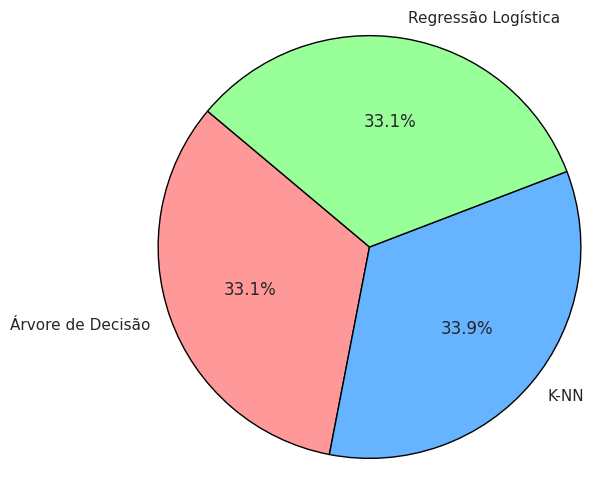

In [46]:
modelos = ['Árvore de Decisão', 'K-NN', 'Regressão Logística']
acuracias = [acc_dt*100, acc_knn*100, acc_lr*100]

cores = ['#FF9999','#66B3FF','#99FF99']

plt.figure(figsize=(6,6))
plt.pie(acuracias, labels=modelos, autopct='%1.1f%%', startangle=140, colors=cores, wedgeprops={'edgecolor':'black'})
plt.axis('equal')
plt.show()


# 5. Explicar qual funcionou melhor

- O resultado pode variar conforme divisão treino/teste.

- A Regressão Logística costuma ir bem porque as classes são quase linearmente separáveis.

- A Árvore de Decisão pode acertar quase tudo, mas cuidado com overfitting.

- O K-NN depende do número de vizinhos (k), então teste diferentes valores de k.

# Resultados

**K-NN** teve a melhor acurácia (95,56%)  

Isso significa que, com o valor de **k** que você usou (provavelmente k=3), o modelo conseguiu classificar melhor as flores no conjunto de teste.  

K-NN funciona bem em datasets pequenos e com classes separáveis.  

**Árvore de Decisão** e **Regressão Logística** ficaram empatadas em 93,33%  

- **Árvore de Decisão**: pode capturar relações não lineares, mas cuidado com overfitting (funciona muito bem no treino, mas pode falhar em novos dados).  
- **Regressão Logística**: modelo linear, funciona bem porque as classes Iris são quase linearmente separáveis.  

**Observação geral:**  

- O resultado pode variar se você mudar a divisão treino/teste (`random_state`) ou o número de vizinhos em K-NN (`k`).  
- Para K-NN, vale testar **k=1, 3, 5, 7** e comparar acurácias para achar o melhor valor.
